<div style="background-color:white; text-align:center; padding:20px;">
    <h2 style="color:black; font-family: Verdana, sans-serif;"><strong>Creating an LLM to find sustainable solutions</strong></h2>
    <p style="font-size: 14px; color: black; font-family: Verdana, sans-serif;"> 
        <table style="margin: auto; border-collapse: collapse;">
            <tr>
                <th style="border: 0;">Names</th>
                <th style="border: 0;">GitHub Username</th>
            </tr>
            <tr>
                <td style="border: 0;">Vince Ammerlaan</td>
                <td style="border: 0;">Vince16270</td>
            </tr>
            <tr>
                <td style="border: 0;">Tommi Lander</td>
                <td style="border: 0;">tommi7</td>
            </tr>
            <tr>
                <td style="border: 0;">Nima Ghafar</td>
                <td style="border: 0;">NimaGhafar</td>
            </tr>
            <tr>
                <td style="border: 0;">Jort Akershoek</td>
                <td style="border: 0;">JortAkershoek</td>
            </tr>
        </table>
    </p>
</div>

<div style="display: flex; justify-content: center; align-items: center; margin-top:20px;">
    <img src="https://static.vecteezy.com/system/resources/previews/017/306/579/original/esg-sustainability-concept-illustration-vector.jpg" alt="genres" style="width: 600px; height: auto;">
</div>

- Client: Mathis Mourey 
- Instructors: Mirabai Vosteen and Beata Skuczynska
- Date: ..-..-2025

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Table of contents </strong></h2>
</div>
<ul style="padding: 0; list-style: none;">
    <li style="text-align: center;"><a href="#1.0">Chapter 1: The Project</a></li>
    <li style="text-align: center;"><a href="#1.0">Chapter 2: Loading Packages, Self-defined functions and the Data</a></li>
    <li style="text-align: center;"><a href="#2.0">Chapter 3: Exploratory Data Analysis</a></li>
    <li style="text-align: center;"><a href="#3.0">Chapter 4: Data Preprocessing</a></li>
    <li style="text-align: center;"><a href="#6.0">Chapter 5: </a></li>
    <li style="text-align: center;"><a href="#5.0">Chapter 6: </a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 7: </a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 8: Results and Conclusions</a></li>
    <li style="text-align: center;"><a href="#8.0">Chapter 9: Sources</a></li>
</ul>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 1: The Project </strong></h2>

</ul>

In this project, we focus on improving the accessibility of policy information related to the energy transition. Governments across Europe and the Netherlands publish numerous policy documents, regulations, and reports to support the shift toward renewable energy sources. These documents are often technical, extensive, and written in academic or legal language, making it difficult for citizens to understand their content. As a result, they miss out on important information about subsidies, regulations, or their own role in the energy transition.

To address this problem, we are developing a chatbot powered by a Large Language Model (LLM). This chatbot is capable of automatically analyzing, summarizing, and translating government documents into plain and understandable language. Users can ask questions through a simple interface, and the chatbot provides clear answers based on factual information.

Our approach consists of collecting policy documents in PDF format, preprocessing the texts using NLP techniques such as tokenization and filtering, and leveraging a powerful pretrained LLM for text processing. Instead of training a model from scratch, we utilize a pretrained model and Retrieval-Augmented Generation (RAG) to generate relevant answers. The generated responses are evaluated based on their clarity, relevance, and reliability.

With this tool, we aim to contribute to a better-informed society in which citizens have easy access to simplified yet essential information. In doing so, we not only increase public engagement in the energy transition, but also strengthen support for sustainable policy.

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 2: Loading Packages, Self-defined functions and the Data</strong></h2>

</ul>

**Packages**

- This section of the notebook covers the necessary Python packages required for our deep learning models. Below is a list of the key packages used

In [3]:
import os
import pandas as pd
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

**Self defined functions**

- This section contains our self defined functions that are essential for our project. These functions are written to streamline repetitive tasks and enhance code readability.

In [4]:
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

**Loading the text from the PDF files**

- Here we load the text from the different PDF files into text format.

In [5]:
pdf_dir = os.path.join("..", "Training_set_text", "European_policies")

data = []
for file_name in os.listdir(pdf_dir):
    if file_name.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, file_name)
        text = extract_text_from_pdf(file_path)
        if text:
            data.append({"file_name": file_name, "text": text})

df = pd.DataFrame(data)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 3: Exploratory Data Analysis </strong></h2>
</div>

**Basic information**

- In this section, we

In [6]:
print("Number of PDF files processed:", len(df))
print("Sample data:")
print(df.head())

Number of PDF files processed: 9
Sample data:
                                           file_name  \
0                        CELEX_32018L2001_EN_TXT.pdf   
1                        CELEX_32019L0944_EN_TXT.pdf   
2                        CELEX_32023L1791_EN_TXT.pdf   
3                        CELEX_32023R0955_EN_TXT.pdf   
4  cellar_71767319-9f0a-11ec-83e1-01aa75ed71a1.00...   

                                                text  
0  DIRECTIVES \nDIRECTIVE (EU) 2018/2001 OF THE E...  
1  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...  
2  I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...  
3  I\n(Legislative acts)\nREGUL ATIONS\nREGUL ATI...  
4   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...  


**Text lengths**

- In this section, we

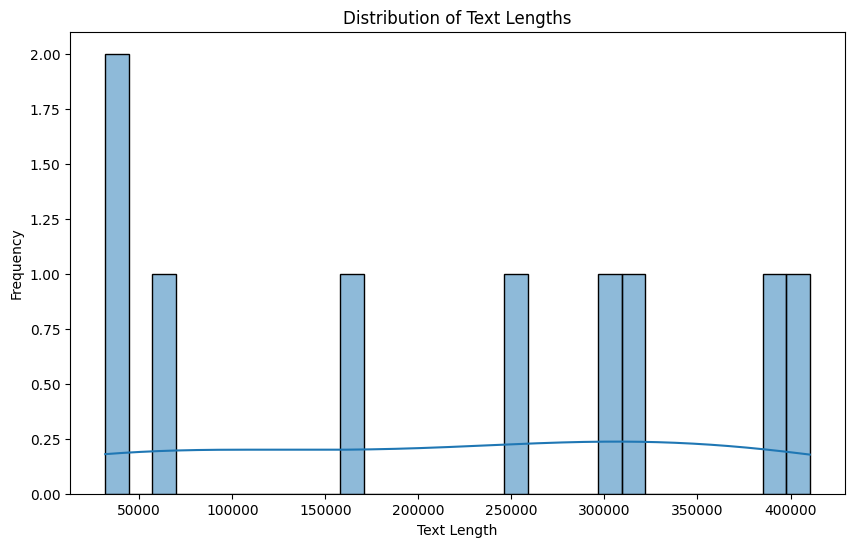

In [7]:
# Add column for text length
df['text_length'] = df['text'].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

**Word cloud**

- In this section, we

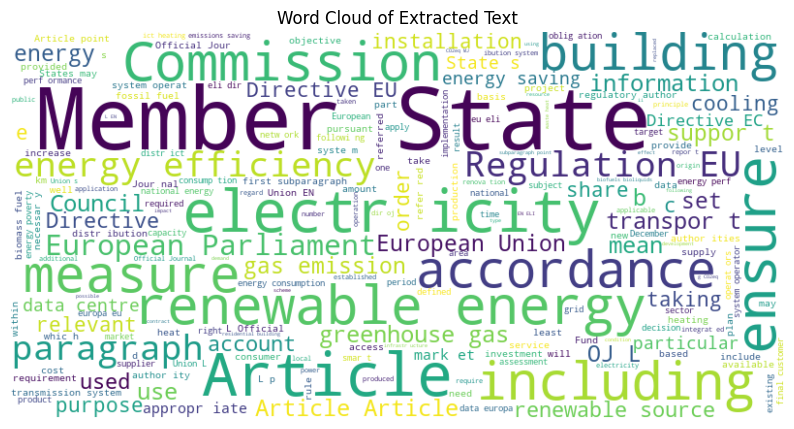

In [8]:
# Generate a word cloud for the combined text
all_text = " ".join(df['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Extracted Text")
plt.show()

**Stop words**

- In this section, we

In [9]:
# Download de stopwoorden als dit nog niet is gedaan
nltk.download('stopwords')

# Stopwoorden ophalen
stop_words = set(stopwords.words('english')) 

# Functie om het aantal stopwoorden in een tekst te tellen
def count_stopwords(text):
    words = text.split()
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count

# word_count toevoegen
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Voeg een nieuwe kolom toe aan de DataFrame met het aantal stopwoorden per bestand
df['stopword_count'] = df['text'].apply(count_stopwords)

# word_count toevoegen
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# stopwoord percentage toevoegen
df['stopword_percentage'] = df['stopword_count'] / df['word_count'] * 100

display(df)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


file_name  \
0                        CELEX_32018L2001_EN_TXT.pdf   
1                        CELEX_32019L0944_EN_TXT.pdf   
2                        CELEX_32023L1791_EN_TXT.pdf   
3                        CELEX_32023R0955_EN_TXT.pdf   
4  cellar_71767319-9f0a-11ec-83e1-01aa75ed71a1.00...   
5  cellar_fc930f14-d7ae-11ec-a95f-01aa75ed71a1.00...   
6                          OJ_L_202302413_EN_TXT.pdf   
7                          OJ_L_202401275_EN_TXT.pdf   
8                          OJ_L_202401364_EN_TXT.pdf   

                                                text  text_length  word_count  \
0  DIRECTIVES \nDIRECTIVE (EU) 2018/2001 OF THE E...       410355       69423   
1  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...       297304       48925   
2  I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...       388256       58299   
3  I\n(Legislative acts)\nREGUL ATIONS\nREGUL ATI...       168580       27183   
4   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        31713        4902   
5   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        61198        9221   
6  ELI: http://data.europa.eu/eli/dir/2023/2413/o...       317288       51603   
7  DIRECTIVE (EU) 2024/1275 OF THE EUR OPEAN PARL...       249066       39342   
8  COMMISSION DELEGATED REGUL ATION (EU) 2024/136...        40383        6181   

   stopword_count  stopword_percentage  
0           22054            31.767570  
1           17671            36.118549  
2           20570            35.283624  
3           10081            37.085679  
4            1693            34.536924  
5            3253            35.278169  
6           18475            35.802182  
7           13103            33.305373  
8            2135            34.541336

Text(0, 0.5, 'Stopwoord percentage')

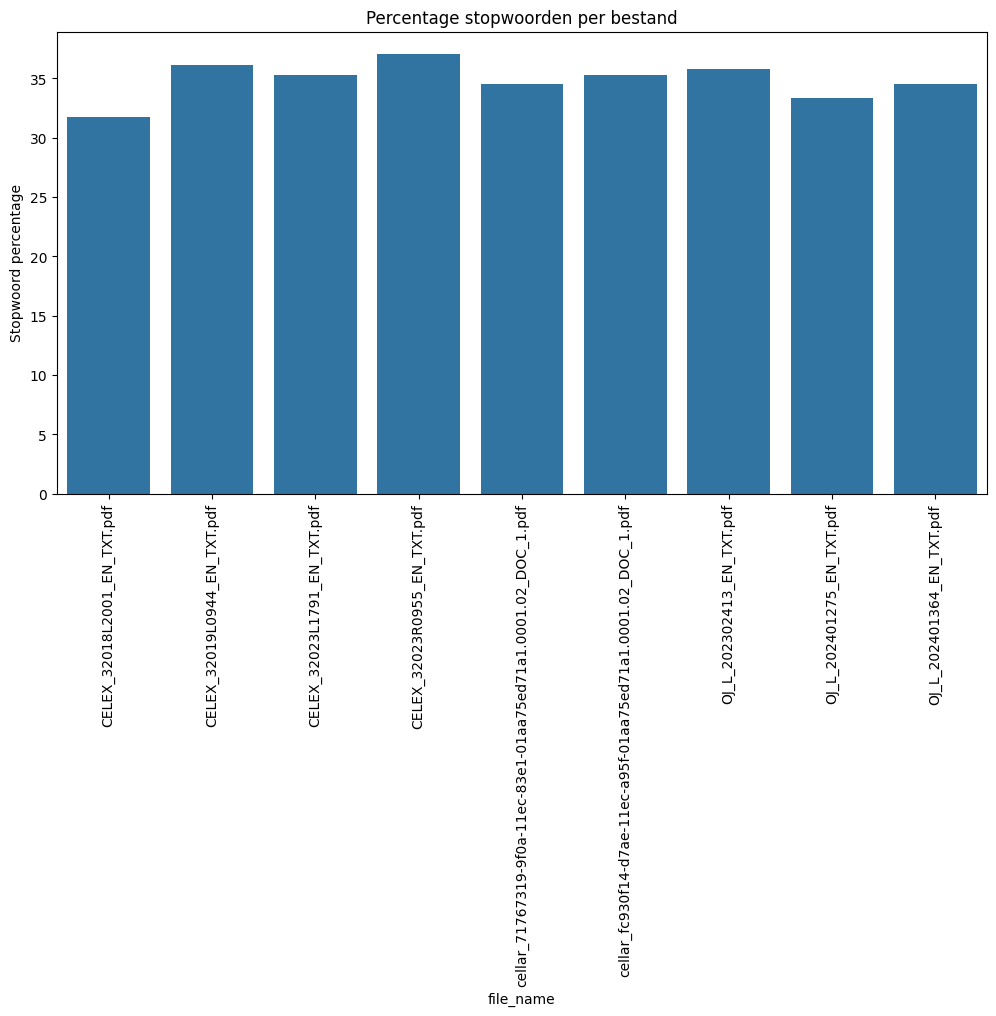

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='file_name', y='stopword_percentage', data=df)
plt.xticks(rotation=90)
plt.title('Percentage stopwoorden per bestand')
plt.ylabel('Stopwoord percentage')

**Stop words for each PDF file**

- In this section, we

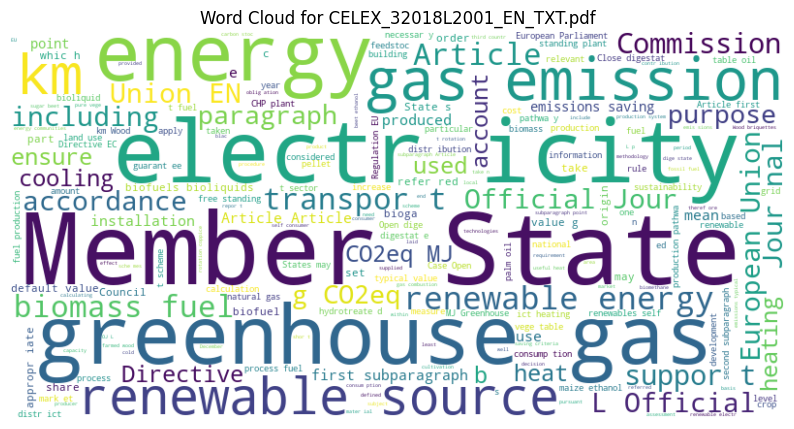

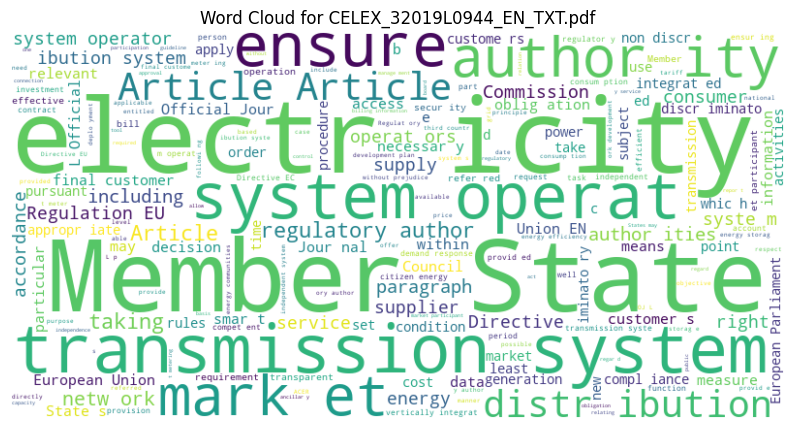

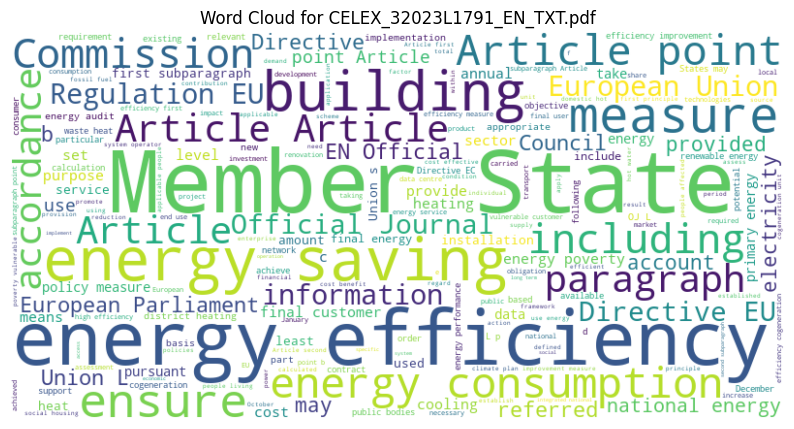

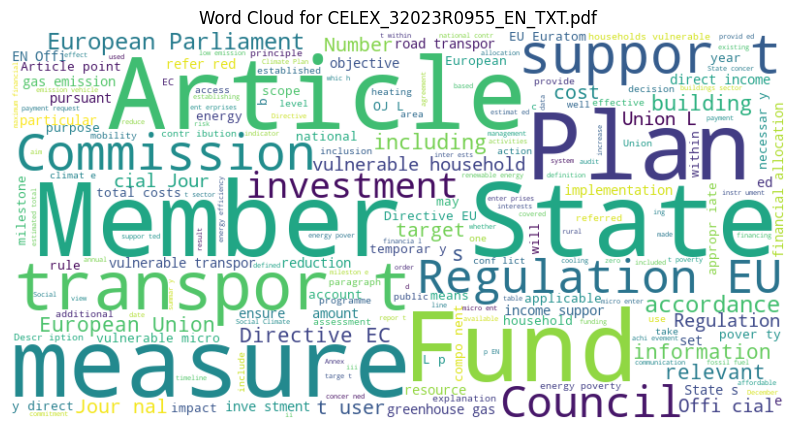

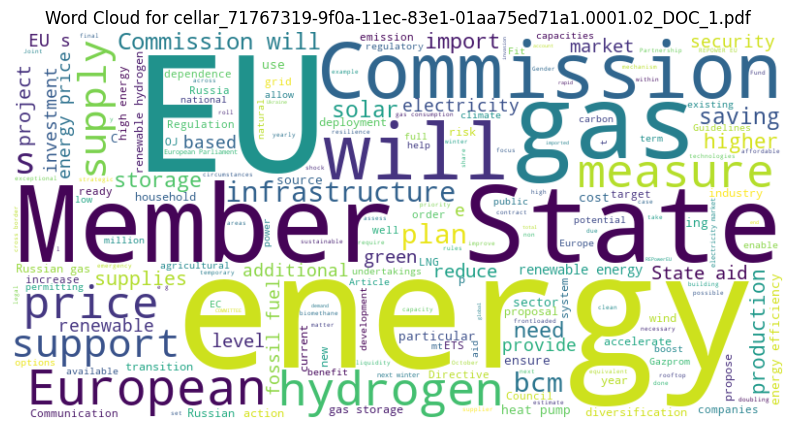

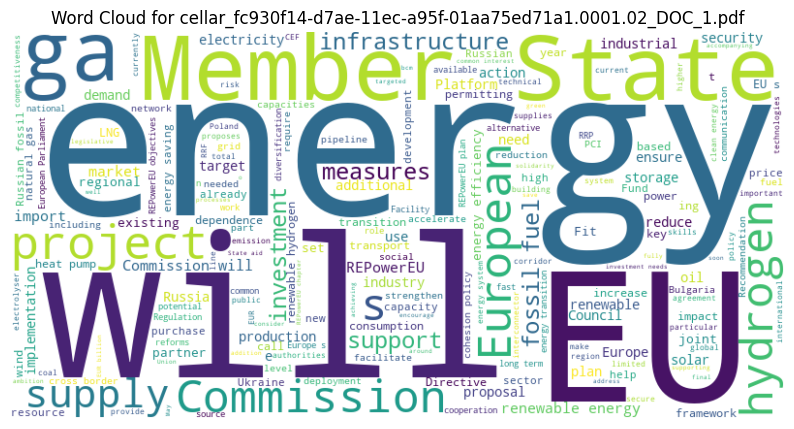

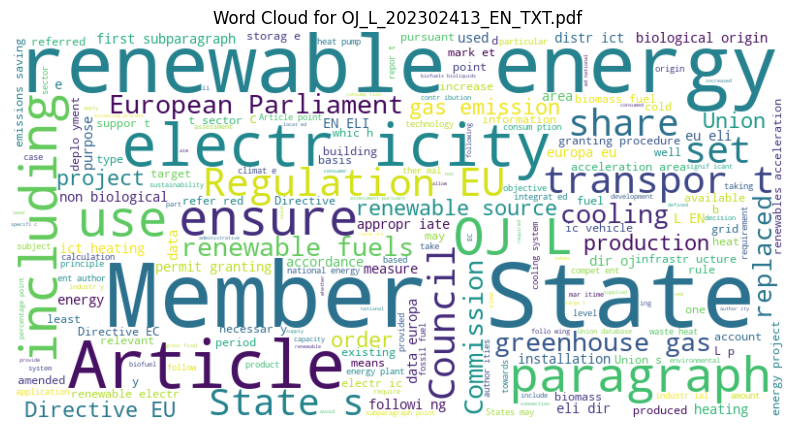

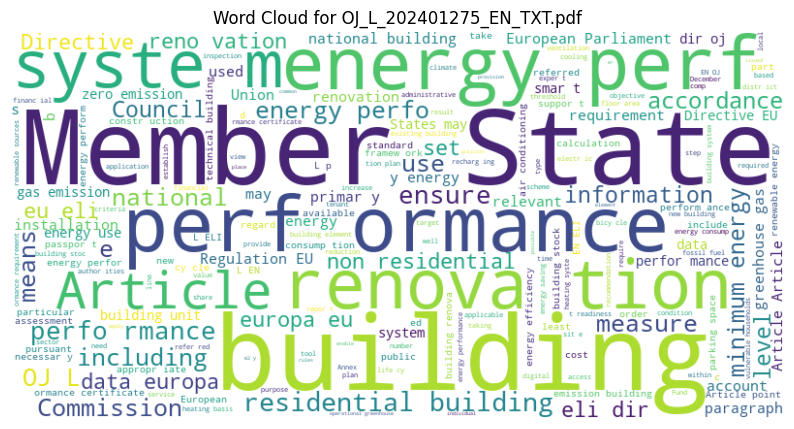

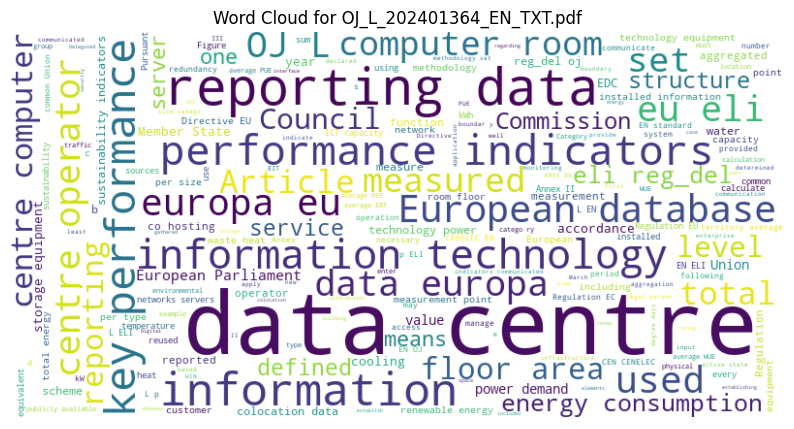

In [11]:
for index, row in df.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(row['text'])
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {row['file_name']}")
    plt.show()

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 4: Data Preprocessing </strong></h2>
</div>

In [12]:
# Save the processed data for LLM input
output_path = "processed_data.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to processed_data.csv


In [13]:
import re
def clean_text(text):
    # Remove extra whitespace, newlines, and special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    text = re.sub(r'[^\w\s.,!?]', '', text)  # Remove special characters except punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

def chunk_text(text, max_tokens, tokenizer):
    tokens = tokenizer.tokenize(text)
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i + max_tokens]
        chunks.append(tokenizer.convert_tokens_to_string(chunk))
    return chunks

In [ ]:
from transformers import AutoTokenizer
tokenizer_name = "gpt2"  # Replace with your model's tokenizer
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
max_tokens = 512

In [ ]:
data =[]
for i, row in df.iterrows():
    text = row['text']
    text = clean_text(text)
    chunks = chunk_text(text, max_tokens, tokenizer)
    for i, chunk in enumerate(chunks):
        data.append({'file_name': row['file_name'], 'chunk_id': i, 'text': chunk})

# Create a DataFrame for the processed data
df_processed = pd.DataFrame(data)
output_path = "processed_data_chunks.json"
df_processed.to_json(output_path, orient='records', lines=True)
print(f"Processed data saved to {output_path}")

Token indices sequence length is longer than the specified maximum sequence length for this model (89707 > 1024). Running this sequence through the model will result in indexing errors


Processed data saved to processed_data_chunks.json


In [ ]:
import pandas as pd

df_chunks = pd.read_json("processed_data_chunks.json", lines=True)

print(df_chunks.head())

                     file_name  chunk_id  \
0  CELEX_32018L2001_EN_TXT.pdf         0   
1  CELEX_32018L2001_EN_TXT.pdf         1   
2  CELEX_32018L2001_EN_TXT.pdf         2   
3  CELEX_32018L2001_EN_TXT.pdf         3   
4  CELEX_32018L2001_EN_TXT.pdf         4   

                                                text  
0  DIRECTIVES DIRECTIVE EU 20182001 OF THE EUR OP...  
1   as technological and industr ial leadership w...  
2   energy policies  and of 23 June 2016 entitled...  
3   period in time where the gap occur red. Both ...  
4   clean technologies, and establish an adequate...  


In [ ]:
import json

with open("processed_data_chunks.json", "r") as f:
    chunks_data = [json.loads(line) for line in f]

chunks = [items['text'] for items in chunks_data]

In [ ]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
chunks_embeddings = embedding_model.encode(chunks, show_progress_bar=True)

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\akers\miniconda3\envs\tf2\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [ ]:
import faiss
import numpy as np

embedding_dim = chunks_embeddings[0].shape[0]
index = faiss.IndexFlatL2(embedding_dim)
index.add(np.array(chunks_embeddings).astype('float32'))


In [ ]:
user_question = "What is the green deal"
question_embedding = embedding_model.encode([user_question])

In [ ]:
top_k = 5
_, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
retreived_chunks = [chunks[i] for i in indices[0]]
context = "\n\n".join(retreived_chunks)

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-7B")
model = AutoModelForCausalLM.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-7B", device_map="auto", torch_dtype="auto")
model.eval()

rag_prompt = f"""
you're an expert in european policy.
you have access to the following context:
{context}
your question is: {user_question}
answer in detail.
"""

rag_input = tokenizer(rag_prompt, return_tensors="pt").to("cuda")
output = model.generate(**rag_input, num_return_sequences=1)
response = tokenizer.decode(output[0], skip_special_tokens=True)
print("Response:", response)

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the disk and cpu.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


Response: 
you're an expert in european policy.
you have access to the following context:
 the best contingency response to the challenges we face. The Commission is ready to develop a REPowerEU plan , in cooperation with Member States , by the summer , to support the diversification of energy supplies, accelerate the transition to renewable energy and improve energy efficiency . This would accelerate the phasing out of Russian gas impo rts and reliance on fossil fuels and provide the best insurance against price shocks in the medium term by fast forwarding the EUs green transition , with a special focus on cross border and regional needs . The need for greater security of supply is adding a new impetus to the objectives of the European Green Deal.

 by Union or national law, by considering as priority the energy efficiency first principle in their procurement procedures. 51 It is also important that Member States monitor how the energy efficiency requirements are taken into account by

In [ ]:
user_question = "What does the green deal mean for eu citizens?"
question_embedding = embedding_model.encode([user_question])

_, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
retreived_chunks = [chunks[i] for i in indices[0]]

context = "\n\n".join(retreived_chunks)

rag_prompt = f"""
you're an expert in european policy.
you have access to the following context:
{context}
your question is: {user_question}
answer in detail.
"""

rag_input = tokenizer(rag_prompt, return_tensors="pt").to("cuda")
output = model.generate(**rag_input, num_return_sequences=1)

response = tokenizer.decode(output[0], skip_special_tokens=True)

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


In [ ]:
print("Response:", response)

Response: 
you're an expert in european policy.
you have access to the following context:
 the best contingency response to the challenges we face. The Commission is ready to develop a REPowerEU plan , in cooperation with Member States , by the summer , to support the diversification of energy supplies, accelerate the transition to renewable energy and improve energy efficiency . This would accelerate the phasing out of Russian gas impo rts and reliance on fossil fuels and provide the best insurance against price shocks in the medium term by fast forwarding the EUs green transition , with a special focus on cross border and regional needs . The need for greater security of supply is adding a new impetus to the objectives of the European Green Deal.

ELI httpdata.europa.euelidir20232413oj 177DIRECTIVE EU 20232413 OF THE EUR OPEAN PARLIAMENT AND OF THE COUNCIL of 18 Oct ober 2023 amending Directiv e EU 20182001, Regulation EU 20181999 and Directiv e 9870EC as regards the promotion of ene

In [ ]:

from transformers import (
     AutoTokenizer,
     AutoModelForCausalLM
)
from accelerate import init_empty_weights, load_checkpoint_and_dispatch

# Replace model_name with your chosen pretrained model
model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="auto",
        torch_dtype="auto",
        low_cpu_mem_usage=True,
)
model.eval()

def generate_chat_response(chat_history, user_input, max_new_tokens=256):
     """
     chat_history: list of (speaker, text) tuples
                        e.g. [("User", "Hello"), ("Assistant", "Hi!"), ...]
     user_input: string containing the user’s new query
     """
     # Append the new user input to the chat history
     chat_history.append(("User", user_input))

     # Construct the prompt (system or role definitions, etc.) 
     # Here is a simple approach:
     prompt_text = ""
     for role, text in chat_history:
          prompt_text += f"{role}: {text}\n"

     # The actual model’s input
     inputs = tokenizer(prompt_text, return_tensors="pt").to("cuda")

     # Generate model output
     output_ids = model.generate(
          **inputs,
          max_new_tokens=max_new_tokens,
          do_sample=True,         # or False if you prefer deterministic output
          top_p=0.9,              # adjust for sampling
          temperature=0.7,        # adjust for creativity
          pad_token_id=tokenizer.eos_token_id
     )

     # Decode the last part of the output to get the assistant’s response
     full_output = tokenizer.decode(output_ids[0], skip_special_tokens=True)

     # If desired, parse or trim out just the relevant completion
     # For this example, we just treat everything after the last "Assistant: " as the reply
     # You might need a more robust approach to reliably parse model output
     split_responses = full_output.split("Assistant: ")
     if len(split_responses) > 1:
          assistant_reply = split_responses[-1].strip()
     else:
          # fallback if no "Assistant:" was found
          assistant_reply = full_output

     # Add assistant reply to chat history
     chat_history.append(("Assistant", assistant_reply))

     # Return the text of the assistant's reply
     return assistant_reply


def chat_loop():
     chat_history = []
     print("Chatbot ready! Type 'exit' to quit.\n")

     while True:
          user_input = input("User: ")
          if user_input.strip().lower() == "exit":
                print("Exiting chat.")
                break
          
          response = generate_chat_response(chat_history, user_input)
          print(f"Assistant: {response}\n")

# You can now start the chatbot
chat_loop()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the disk and cpu.


Chatbot ready! Type 'exit' to quit.



c:\Users\akers\miniconda3\envs\tf2\lib\site-packages\transformers\generation\utils.py:2345: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cuda, whereas the model is on cpu. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cpu') before running `.generate()`.
  warnings.warn(
